In [1]:
import pandas as pd
import numpy as np
import math
import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn.tree

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

## Decision Trees

One classification algorithm we can use is a decision tree. A DT is one of the algorithms that is easiest to visualize and understand, it can be represented as a series of simple decisions, in the shape of a tree. 

The tree effectively looks at each feature and splits the records based on that feature's value. It repeats this until every record is grouped into one of the target

First we'll load some data and take a quick look at it, not a full eda. The pairplot is slow and large, but serves to visually highlight what we are doing in the classification - we want to effectively draw a line separating the blues from the oranges in those scatter plots. The plots show a 2d slice, the full classification does it in 30 dimensions, but the concept is the same, draw a line that splits the groups as accurately as we can. Note the sklearn_to_df function below, the sklearn datasets aren't returned in nice clean dataframes like we're used to. This function just formats them to be so. This would be a good addition to the utility file is you're so inclined. 

In [15]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

#Swap datasets for a more complex example
df = sklearn_to_df(sklearn.datasets.load_breast_cancer())

#df = sklearn_to_df(sklearn.datasets.load_iris())
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


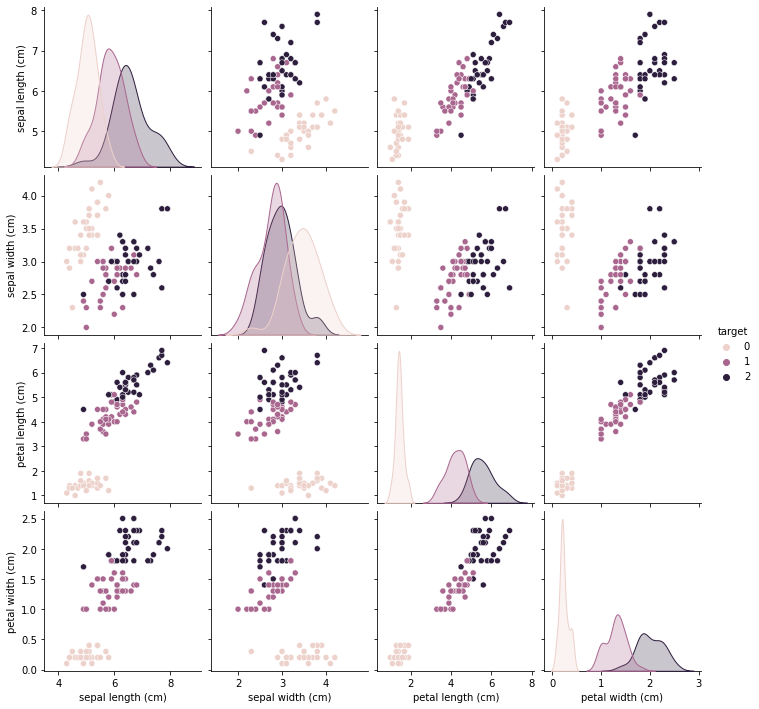

In [4]:
# This serves an illustrative point, but is slow
# Comment out if running frequently
#sns.pairplot(data=df.sample(100), hue="target")

<h3>Create Tree Model and Plot it</h3>

8
0.9230769230769231


[Text(308.24999999999994, 410.71999999999997, 'X[22] <= 114.45\ngini = 0.455\nsamples = 426\nvalue = [149, 277]'),
 Text(242.09999999999997, 362.4, 'X[27] <= 0.146\ngini = 0.159\nsamples = 298\nvalue = [26, 272]'),
 Text(196.2, 314.08, 'X[13] <= 53.585\ngini = 0.07\nsamples = 274\nvalue = [10, 264]'),
 Text(147.6, 265.76, 'X[27] <= 0.136\ngini = 0.057\nsamples = 271\nvalue = [8, 263]'),
 Text(93.6, 217.44, 'X[13] <= 38.605\ngini = 0.031\nsamples = 258\nvalue = [4, 254]'),
 Text(57.599999999999994, 169.12, 'X[14] <= 0.003\ngini = 0.016\nsamples = 248\nvalue = [2, 246]'),
 Text(28.799999999999997, 120.80000000000001, 'X[1] <= 19.9\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(14.399999999999999, 72.48000000000002, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(43.199999999999996, 72.48000000000002, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(86.39999999999999, 120.80000000000001, 'X[21] <= 33.27\ngini = 0.008\nsamples = 242\nvalue = [1, 241]'),
 Text(72.0, 72.4800000000000

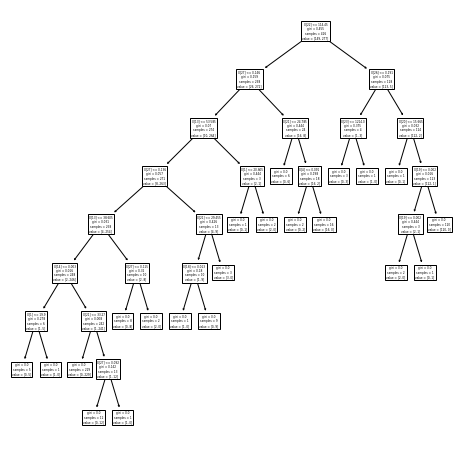

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Trees don't theoretically require dummies, but sklearns implemention does.
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print(clf.score(X_test, y_test))
plot_tree(clf)

### Feature Importance

Since the decision tree is a model we can look at in detail, we can also extract the feature importance. We'll do more with this in the feature selection part in a couple of weeks.  

In [17]:
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=df2.drop(columns={"target"}).columns)
feat_imp.sort_values(ascending=False)[0:5]

worst perimeter         0.705463
worst concave points    0.127397
worst texture           0.056743
worst concavity         0.021540
mean smoothness         0.018349
dtype: float64

##### Change Split Criteria

We can repeat with entropy to see what results from that, and if there's a real difference. 

7
0.9370629370629371


[Text(271.0285714285714, 407.7, 'X[22] <= 114.45\nentropy = 0.934\nsamples = 426\nvalue = [149, 277]'),
 Text(138.17142857142858, 353.34000000000003, 'X[27] <= 0.136\nentropy = 0.427\nsamples = 298\nvalue = [26, 272]'),
 Text(42.51428571428571, 298.98, 'X[1] <= 21.435\nentropy = 0.158\nsamples = 261\nvalue = [6, 255]'),
 Text(21.257142857142856, 244.62, 'entropy = 0.0\nsamples = 214\nvalue = [0, 214]'),
 Text(63.77142857142857, 244.62, 'X[23] <= 643.25\nentropy = 0.551\nsamples = 47\nvalue = [6, 41]'),
 Text(42.51428571428571, 190.26, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(85.02857142857142, 190.26, 'X[10] <= 0.446\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(63.77142857142857, 135.89999999999998, 'X[14] <= 0.007\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(42.51428571428571, 81.54000000000002, 'X[1] <= 21.71\nentropy = 0.439\nsamples = 11\nvalue = [1, 10]'),
 Text(21.257142857142856, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0

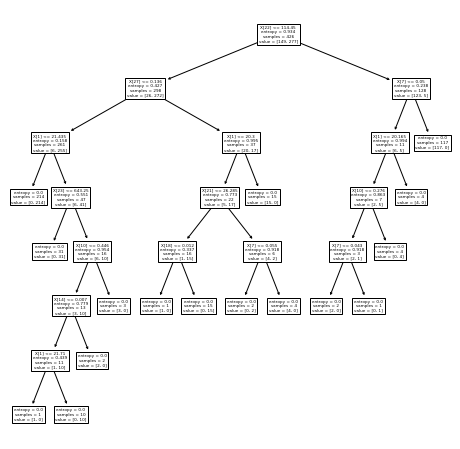

In [18]:
#Tree with entropy
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

print(clf.get_depth())
print(clf.score(X_test, y_test))

plot_tree(clf)

### Fancy Visualizations

We can use the export_graphviz to make a nicer visualization, but it is a little bit of a process. You may need to install it (pip install python-graphviz or conda install python-graphviz). The command below will generate a file that we can then visualize. Open it and copy it into an online tool such as: https://dreampuf.github.io/GraphvizOnline There are also vscode plugins that you can try to picture things in the IDE.

This is optional.

In [87]:
from sklearn.tree import export_graphviz
export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = df.drop(columns={"target"}).columns, 
                     class_names=["0","1"],
                     filled = True)

<h2>Decision Tree Decisions</h2>

The splits that the decision tree makes are decided by one of the criteria that we talked about in the powerpoint: gini or entropy. The tree constuction is a recursive process, each of the processes below looks at one leaf at a time, treating it like its own tree. 

<h3>Gini and Entropy</h3>

<h4>Gini Impurity and Gini Gain</h4>

Gini is the default criteria for measuring the quality of a split. When using Gini, at each node the tree algorith will choose the split that maximizes the Gini Gain. 

The Gini impurity is defined as the probability that you would misclassify a randomly selected item, when classifying according to the distribution in the dataset. This is intuitively pretty simple, check here for a good illustration: https://victorzhou.com/blog/gini-impurity/. The formual is:

$ H(Q_m) = \sum_k p_{mk} (1 - p_{mk}) $

The Gini gain takes this idea and builds on it. It is defined as the total impurity minus the weighted impurity after a split - or basically how much impurity was removed by splitting. The link above also illustrates this well. At each node of the tree, the algorithm looks at the data and chooses the split that has the highest Gini gain, that's how the decisions are chosen, ordered, and structured into a tree. 

<h4>Entropy and Information Gain</h4>

Entropy is the alternate method for measuring the quality of a split. It is similar in concept to Gini but a little more mathmatically complex (that we don't need to derive). The formula for entropy is:

$ H(Q_m) = - \sum_k p_{mk} \log(p_{mk}) $

The probability of each item being selected multiplied by the log base 2 of that probability. 

An illustrated example of entropy and information gain is here: https://victorzhou.com/blog/information-gain/

Information gain is very similar to Gini gain at this point, we take the current entropy and subtract the weighted average of the entropy of each branch after the split. The algorithm finds the split that maximises this, and uses it to create the tree. 

<h3>Tree Fitting</h3>

Decision trees have a few considerations, one is how many levels should the tree be? The more levels (splits) we have, the more granular our decisions will be. However, what if our tree gets so granular that it becomes too specific? The algorithm chases accuracy, and if there is a way that it can get more accuracy, it will. In practice, this may look like a tree with many, many levels - going down into very specifc sets of critera to divide the data. In one sense, this is good - we are creating a model that does an excellent job in dividing our data between classes; in another sense it can be bad - we may get a model that is very well suited to one set of data, but does poorly if we were to provide it another dataset. Since we want to make predictions for new data that we don't already have, this is bad. 

<b>This leads us to the idea of overfitting and underfitting, which we will get into in more depth in a few days. In short, we want a model that is tailored to our data, to make accurate predictions, but not so customized to our specific data that it is too customized to be accurate with other situations with new data. </b>

<h3>Combatting Tree Overfitting</h3>

<h4>Pre-Construction</h4>

With a tree, one thing that we can do to limit the potential for overfitting is to cap the number of levels that the algorithm is allowed to create. If we do so, the model generated will have to seek the most accuracy when limited to X number of decisions. This will help prevent the model from being overfitted. In scenarios where there are lots of features, trees are often prone to overfitting. 

Decision trees also have other options, such as min_samples_split - the minimum number of results that need to be in a leaf before it is allowed to be split, that will have a similar impact. If a leaf can split if there are only 2 items (default), it can be very customized to the data as it can just split if there are two outcomes in a node. If we limit this we effectively force the tree to be more general - even if there's a difference in values in a node, it can't split those until there are X number of values there. 

There are a couple more options that are similar, such as max_features which will limit how many features a tree is able to consider. 

We will modify these options in more depth when doing grid searches next(ish) time. 

3
0.951048951048951


[Text(241.79999999999998, 380.52, 'X[22] <= 114.45\ngini = 0.455\nsamples = 426\nvalue = [149, 277]'),
 Text(148.79999999999998, 271.8, 'X[27] <= 0.136\ngini = 0.188\nsamples = 305\nvalue = [32, 273]'),
 Text(74.39999999999999, 163.07999999999998, 'X[20] <= 16.825\ngini = 0.066\nsamples = 264\nvalue = [9, 255]'),
 Text(37.199999999999996, 54.360000000000014, 'gini = 0.023\nsamples = 253\nvalue = [3, 250]'),
 Text(111.6, 54.360000000000014, 'gini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(223.2, 163.07999999999998, 'X[21] <= 27.575\ngini = 0.493\nsamples = 41\nvalue = [23, 18]'),
 Text(185.99999999999997, 54.360000000000014, 'gini = 0.375\nsamples = 24\nvalue = [6, 18]'),
 Text(260.4, 54.360000000000014, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(334.79999999999995, 271.8, 'X[24] <= 0.1\ngini = 0.064\nsamples = 121\nvalue = [117, 4]'),
 Text(297.59999999999997, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(371.99999999999994, 163.07999999999998, 'X[2

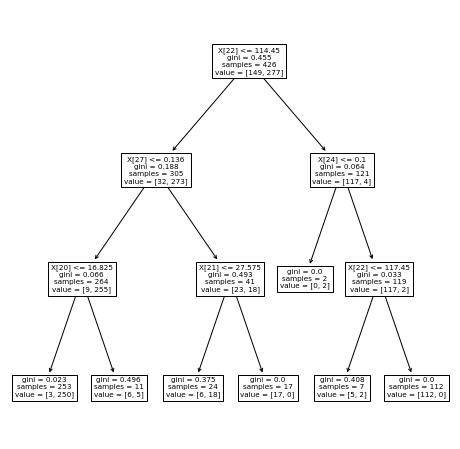

In [88]:
#limit depth
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

print(clf.get_depth())
print(clf.score(X_test, y_test))
plot_tree(clf)

Limiting depth is simple, as above. Depending on the data this may have negligable or significant impacts on the overall accuracy. 

How deep should the tree be? The theoretical maximum is n-1, but that's not very practical. On a very small scale such as this one, you might just see what happens by default, then dial it back 1 or 2 or 3.... If we take that concept a bit further, we can construct what's called a Grid Search. The Grid Search will try multiple values for max depth, and give us back all the results. 

<h3>Hyperparamaters</h3>

This also introduces us to the idea of a Hyperparamater - a paramater that controls the learning process of the algorithm. In this case max depth is a hyperpararmater (the criteria, min_split_size, and max_features are all other ones) - whatever we set it to will control how the model is created, and the impact of changing it isn't always determinable in advance. Hyperparamaters will come up in most algorithms that we use to create models, and the process for selecting what they should be is often based on trial and error. We will dig into Hyperparamaters more soon - hyperparamater tuning is one of the ways that we can maximize accuracy of our models through selection of the optimum combination of hyperparamater settings. 

In general, many of the things that you can provide as arguments to create the models are hyperparamaters. HP are special because they aren't things that are learned during model training (like which splits to make in a tree), they have to be set ahead of time. 

## Post-Construction Tools to Combat Overfitting - Pruning

Another thing we can do is called pruning, as the name suggests it is basically trimming off the excess to get a nice clean tree. The pruning in sklearn is called ccp_alpha or cost complexity pruning. The premise is that it will look for the highest impurities and then cut the tree back. 

<h4>Cost Complexity Pruning</h4>

We don't need to spend an excess of time looking at the details of pruning, be we should cover the basic math and logic behind it. The base of the concept is something called a Cost Complexity Measure for a given tree:

$ R_\alpha(T) = R(T) + \alpha|\widetilde{T}| $

Where:

$ R(T) $ is the misclassification rate of the tree. 

$ |\widetilde{T}| $ is the number of terminal nodes. 

If you look at a single node (T = 1), then the formula is:

$ R_\alpha(t)=R(t)+\alpha $

So alpha is the value needed to raise the cost complexity of the node (right side of the equation) to match the cost complexity of the branch (left side). Ideally we want the branches to reduce our impurity - we want the branches to have a lower amount of misclassification. The pruning algoritm picks off the nodes with the lowest alpha, or those that are least improved by splitting, until that alpha value reaches whatever limit is specified. As nodes are killed off, the tree gets smaller and less deep, the end result being the same as if we limited it via a hyperparamater. 


We can use some sklearn demo stuff to illustrate the differences with different alpha levels, and thus different 'aggressiveness' of pruning. This demonstrates he idea of managing accuracy in the training set vs the testing set to combat overfitting, something that will come up regularly. Here we are purposefully limiting how accurate the model can get during training in order to ensure it does not become overfitted. 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

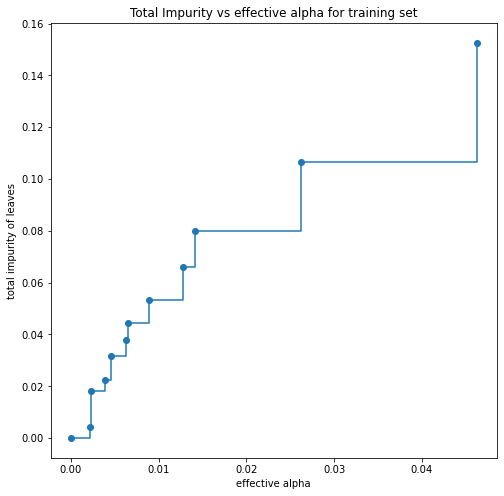

In [89]:
#limit depth
clf = DecisionTreeClassifier()

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In the chart above, the more alpha we allow, the more pruning is done, the less tailored to the data the model is allowed to become during training. 

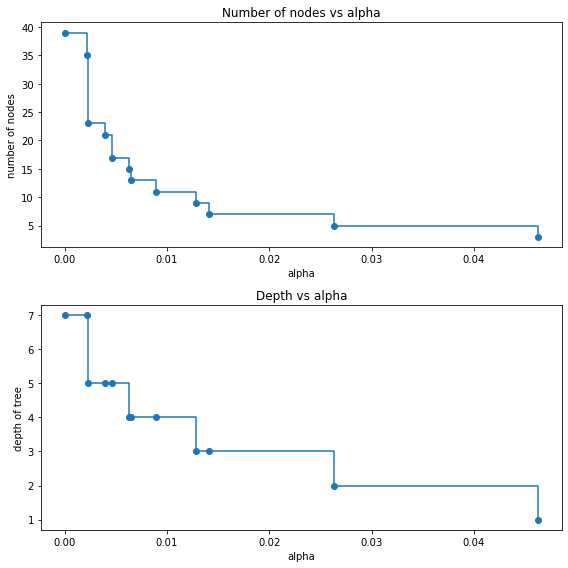

In [90]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

The alpha value acts as a limiter, we can see in the graphs above, the higher alpha gets the more simple the tree is forced to become - less depth and fewer nodes. The impact is the same as if we were to use the HP to set limits here. 

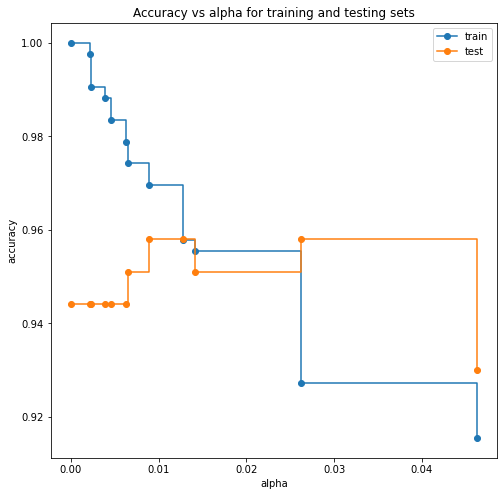

In [91]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Here's the important bit - the impact on the test data predictions. As we saw above, if we let the tree get more and more specific (more nodes and more depth) the training accuracy will get higher and higher, and the impurity lower and lower. This is what the algorithm "wants" to do, it is trying to be as accurate as it possibly can. There's too much of a good thing here, as the model can become overfitted to the specific training data, and not as useful in general situations. 

By limiting the algorithm's ability to chase that accuracy we can stop it before that training becomes too specialized - here we are doing so with the pruning functionality, next we'll do so with tuning the HP. 

This idea comes up regularly, we want to train the model to be really accurate, but kill that process once it begins to get too specific. 

# Working Example

## Load Dataset - heart.csv

In [92]:
#Load Data
df_ = pd.read_csv("data/heart.csv")
df_.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [93]:
#Do some exploration

## Create and Fit Model, View Tree
Also try a few options and observe accuracy and tree size.

In [94]:
#Model


16
0.7913043478260869


[Text(260.4166071428571, 422.08941176470586, 'X[14] <= 0.5\ngini = 0.497\nsamples = 688\nvalue = [319, 369]'),
 Text(176.73321428571427, 396.50823529411764, 'X[4] <= 151.0\ngini = 0.306\nsamples = 392\nvalue = [74, 318]'),
 Text(102.63214285714284, 370.9270588235294, 'X[6] <= 0.5\ngini = 0.236\nsamples = 337\nvalue = [46, 291]'),
 Text(38.262857142857136, 345.3458823529412, 'X[1] <= 132.0\ngini = 0.48\nsamples = 40\nvalue = [16, 24]'),
 Text(17.005714285714284, 319.7647058823529, 'X[12] <= 0.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(8.502857142857142, 294.1835294117647, 'X[1] <= 97.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(4.251428571428571, 268.6023529411765, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.754285714285713, 268.6023529411765, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(25.508571428571425, 294.1835294117647, 'X[2] <= 188.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(21.257142857142853, 268.6023529411765, 'gini = 0.0\nsamp

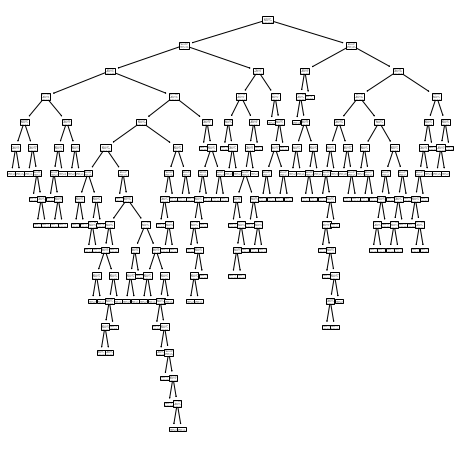

In [95]:
#View Tree


## Use Pruning

In [96]:
#Model with Pruning


In [97]:
#Find best alpha

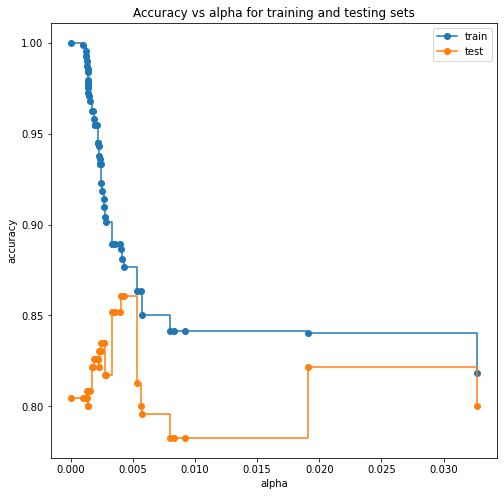

In [98]:
#Plot

7
0.8130434782608695


[Text(226.92, 407.7, 'X[14] <= 0.5\ngini = 0.497\nsamples = 688\nvalue = [319, 369]'),
 Text(141.35999999999999, 353.34000000000003, 'X[4] <= 151.0\ngini = 0.306\nsamples = 392\nvalue = [74, 318]'),
 Text(74.39999999999999, 298.98, 'X[6] <= 0.5\ngini = 0.236\nsamples = 337\nvalue = [46, 291]'),
 Text(44.64, 244.62, 'X[1] <= 132.0\ngini = 0.48\nsamples = 40\nvalue = [16, 24]'),
 Text(29.759999999999998, 190.26, 'X[12] <= 0.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(14.879999999999999, 135.89999999999998, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(44.64, 135.89999999999998, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(59.519999999999996, 190.26, 'gini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(104.16, 244.62, 'X[4] <= 140.5\ngini = 0.182\nsamples = 297\nvalue = [30, 267]'),
 Text(89.28, 190.26, 'gini = 0.139\nsamples = 252\nvalue = [19, 233]'),
 Text(119.03999999999999, 190.26, 'X[1] <= 104.5\ngini = 0.369\nsamples = 45\nvalue = [11, 34]'),
 Text(104.1

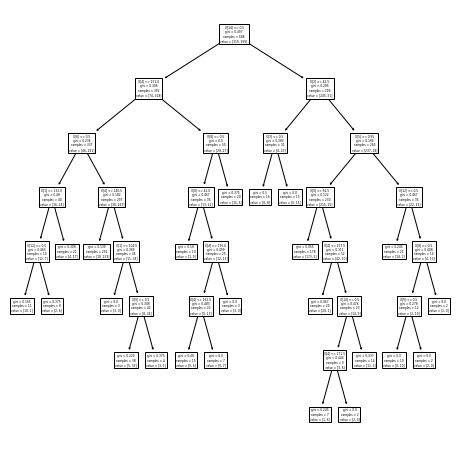

In [99]:
#Model pruned best
